## Algorytm roju cząstek (PSO - particle swamp optimization)

Inspirowany jest procesami zachodzącymi w stadach ryb bądź ptaków. Podobnie jak stado ptaków, rój podąża za przywódcą, bieżącym, najlepszym znanym rozwiązaniem, przyspieszając i zmieniając kierunek, gdy lepsze rozwiązanie zostanie znalezione. W naturze można te zachowania odnieść np. do poszukiwania jedzenia. 


Zaproponowany w 1995 roku przez R.C.Eberharta (elektrotechnika) i J. Kennediego (psychologa społecznego) i pierwotnie skonstruowany do prowadzenia symulacji zachowań społecznych. W praktyce PSO i jego modyfikacje mają wiele cech wspólnych z algorytmami genetycznymi, jednak nie korzysta się w nich z operatorów genetycznych, takich jak krzyżowanie czy mutacja. 

Populacja możliwych rozwiązań traktowana jest jako rój, a każdy jej element (możliwe rozwiązanie problemu) jest cząstką. Kolejne kroki algorytmu sprawiają, że cząstki przemieszczają się, symulując adaptację roju do środowiska, czyli poszukują optimum. W roju występuje lider, czyli cząstka o najlepszym położeniu. Każda cząstka ma też przypisanych sąsiadów, którzy podążają razem z nią. Każda cząstka jest więc w ruchu pod wpływem lokalnej, najlepszej pozycji lidera i kieruje się również w jego stronę. Takie zachowanie powoduje przemieszczanie cząstek w kierunku najlepszych rozwiązań. Dużą zaletą jest pamiętanie stanu poprzedniego, co pozwala na eksplorację znanej okolicy, a jednoczenie nie hamuje eksplorowania przestrzeni dalszych.

![pso_gif.gif](https://www.scottcondron.com/images/copied_from_nb/my_icons/pso_gif.gif "Source: Wikipedia")

Podstawowy algorytm PSO można sformułować w następujący sposób:
1. Losowe tworzenie próby początkowej (zbioru punktów reprezentujących cząstki) – dla każdej cząstki określone zostają położenie i prędkość początkowa.
2. Obliczenie funkcji przystosowania dla próby.
3. Wybór najlepszego rozwiązania – określenie najlepszego sąsiada oraz wytypowanie lidera roju.
4. Sprawdzenie kryterium stopu.
5. Tworzenie kolejnej próby według zdefiniowanej reguły – nowy wektor prędkości obliczany jest na podstawie parametrów cząstki, jej najlepszego sąsiada oraz lidera roju, a nowe położenie cząstki określane jest na podstawie jej parametrów (położenia oraz nowego wektora prędkości).
6. Iteracja od punktu 2.

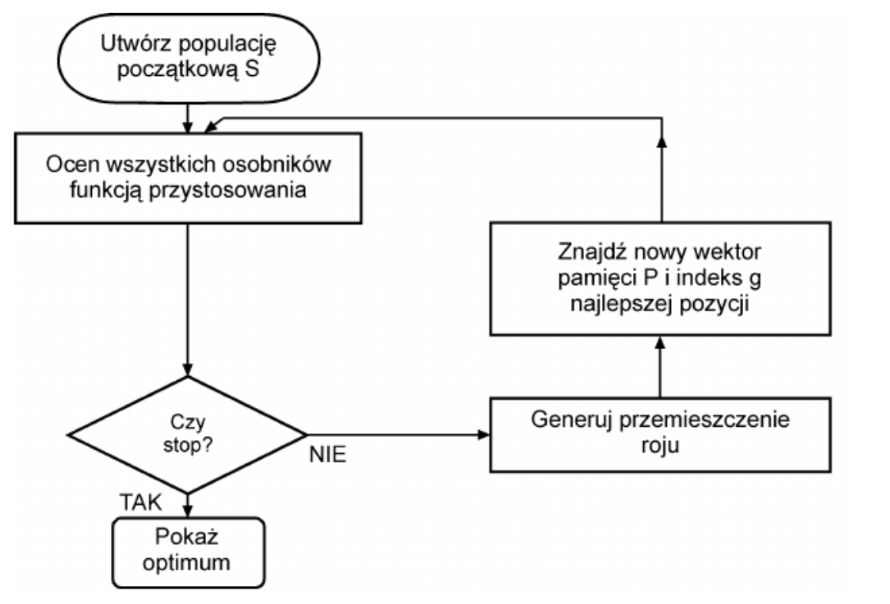

Omówmy przypadek zastosowania PSO do optymalizacji **funkcji kulistej (sphere function)** - jest ona standardową funkcją używaną jako problem testowy wydajności dla algorytmów optymalizacyjnych.

$f(x_1 \cdots x_n) = \sum_{i=1}^n x_i^2$

$\text{minimum w }f(0, \cdots, 0) = 0$

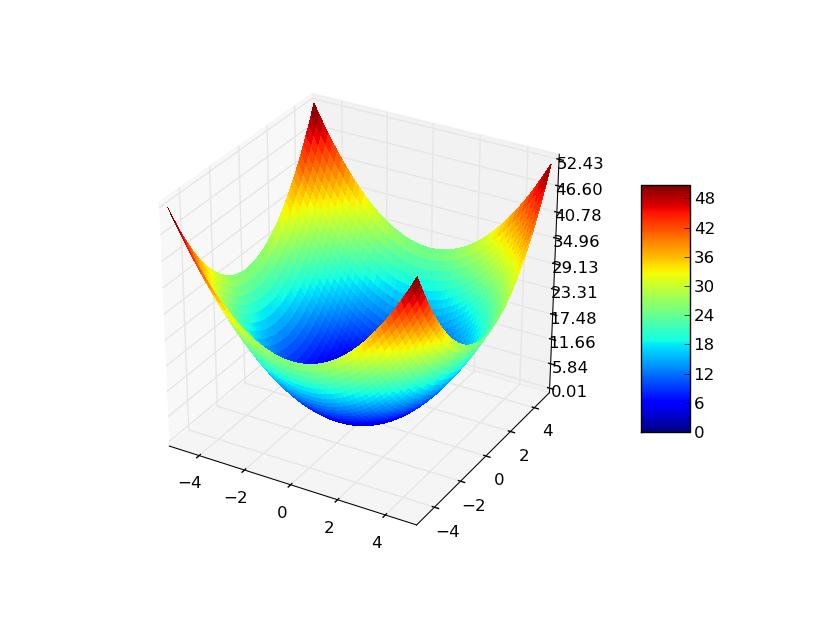

### Kilka słów o parametrach:

w - współczynnik inercji (inertia weight)- decyduje o stopniu swobody ruchu cząstek w przestrzeni zmiennych. 

c1 - tzw. the cognitive scaling constant

c2 - tzw. the social scaling constant

Stałe c1 i c2 to parametry skalujące, również określane jako parametry zaufania, gdzie c1 wyraża zaufanie, jakie cząstka ma do siebie, podczas gdy c2 wyraża zaufanie, jakie cząstka ma do swoich sąsiadów.

Przy c1 = c2 = 0 cząstki lecą z obecną prędkością, dopóki nie uderzą w granicę przestrzeni poszukiwań (zakładając brak bezwładności). Jeśli c1 > 0 i c2 = 0, wszystkie cząstki są niezależne. Każda cząstka znajduje najlepszą pozycję w swoim sąsiedztwie, zastępując obecną najlepszą pozycję, jeśli nowa pozycja jest lepsza. 
Jeśli c2 > 0 i c1 = 0, cały rój jest przyciągany do jednego punktu.



In [ ]:
import numpy as np
# zdefiniowanie funkcji przystosowania
def sphere(x):
    return np.sum(np.square(x))


# stwórzmy tablice do wyrysowania później przebiegu algorytmu
avgs = []
bests_fitness = []

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):
    
    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p) for p in particles])
        
        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)
            
        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
        print('Epoch:',i)
        print('Swarm best position:',swarm_best_position)
        print('Swarm best fitness:', swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness

# uruchomienie algorytmu PSO dla wybranej funkcji
solution, fitness = pso(sphere)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

Epoch: 0
Swarm best position: [-0.51899134 -0.08317697]
Swarm best fitness: 0.27627042307098776
Epoch: 1
Swarm best position: [-0.46057083  0.2364763 ]
Swarm best fitness: 0.26804652839012083
Epoch: 2
Swarm best position: [-0.06770769 -0.30996564]
Swarm best fitness: 0.10066303133670222
Epoch: 3
Swarm best position: [-0.09621804 -0.01523283]
Swarm best fitness: 0.00948995100386052
Epoch: 4
Swarm best position: [ 0.03843201 -0.55765944]
Swarm best fitness: 0.00948995100386052
Epoch: 5
Swarm best position: [-0.01684328 -0.00165793]
Swarm best fitness: 0.000286444939506738
Epoch: 6
Swarm best position: [-0.49949955  0.16510918]
Swarm best fitness: 0.000286444939506738
Epoch: 7
Swarm best position: [-0.71772178  0.12483814]
Swarm best fitness: 0.000286444939506738
Epoch: 8
Swarm best position: [-0.76632292 -0.01554201]
Swarm best fitness: 0.000286444939506738
Epoch: 9
Swarm best position: [-0.75629338 -0.08368383]
Swarm best fitness: 0.000286444939506738
Epoch: 10
Swarm best position: [-0.

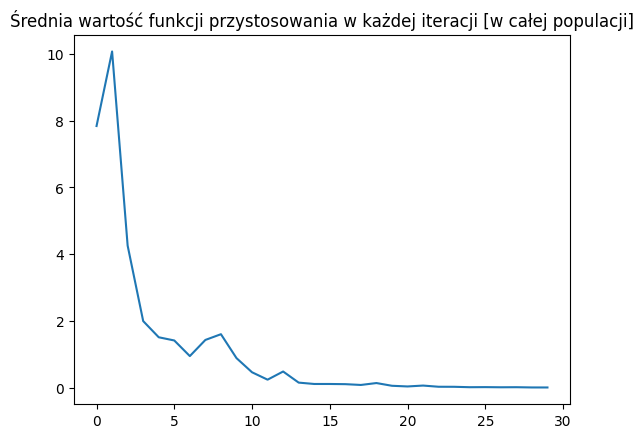

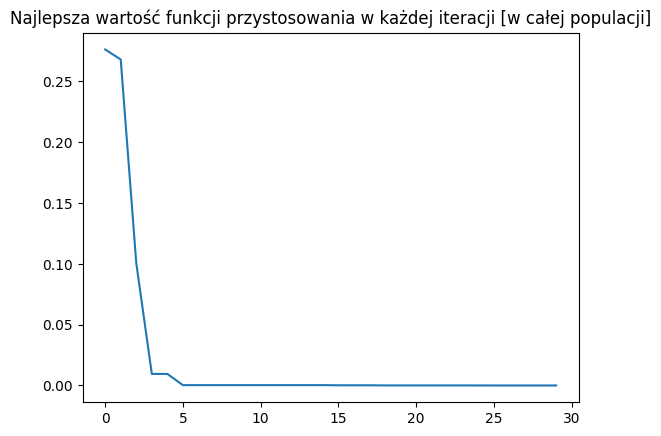

In [ ]:
import matplotlib.pyplot as plt
plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

## Zadania do samodzielnego wykonania

1.

Proszę, korzystając z algorytmu roju cząstek znaleźć minimum funkcji 

$f(x,y)= x^{2} + y^{2} − 20(cos \pi x + cos \pi y − 2)$ w przedziale 𝑥, 𝑦 ∈ [−10,10],  


przy założeniu że rozwiązanie jest reprezentowane przez wektor [𝑥𝑖, 𝑦𝑖]. 

Proszę zbadać: 
- funkcjonowanie algorytmu dla c1=0, c2=2 
- funkcjonowanie algorytmu dla c1=2, c2=0 oraz kilku przypadków pośrednich. 
- funkcjonowanie algorytmu dla c1 = c2 = 2,2
- funkcjonowanie dla różnych wartości w.


Za każdym razem należy podać średnie wyniki (wartość fukcji przystosowania) oraz odchylenie standardowe dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

Należy opisać, który wariant sprawdzał się najlepiej.

2.

Uzyskany najlepszy wynik proszę w miarę możliwości porównać z algorytmem genetycznym – dedykowanym dla optymalizacji tej samej funkcji. Zakładamy użycie takiej samej liczby epok dla obu algorytmów.
Należy porównać czas działania obydwu algorytmów.

## Zadania dla chętnych

3*.

Proszę obejrzeć jak działa algorytm w trybie animacji dla obydwu wspomnianych w notatniku funkcji. 


http://www.alife.pl/files/opt/d/OptiVisJS/OptiVisJS.html?lang=pl


In [2]:
import numpy as np

# zdefiniowanie algorytmu roju cząstek
def pso(cost_func, dim=2, num_particles=30, max_iter=30, w=0.5, c1=1, c2=2):
    
    # zainicjowanie cząstek i ich prędkości
    particles = np.random.uniform(-10, 10, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # inicjalizacja najlepszych pozycji cząstek oraz funkcji przystosowania (fitness function)
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # iterujemy sie przez podana w funkcji ilosc iteracji, aktualizujac prednosci i pozycji każdej z cząstek
    for i in range(max_iter):
        # aktualizacja wartości prędkości cząstek
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # aktualizacja pozycji cząstek
        particles += velocities

        # ewaluacja funkcji przystosowania dla każdej z cząstek
        fitness_values = np.array([cost_func(p) for p in particles])
        
        # zapisujemy średnią wartość funkcji przystosowania w roju
        avgs.append(np.mean(fitness_values))
        # aktualizacja najlepszych pozycji i funkcji przystosowania
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)
            
        # zapisujemy najlepszą wartość funkcji przystosowania
        bests_fitness.append(swarm_best_fitness)
        # print('Epoch:',i)
        # print('Swarm best position:',swarm_best_position)
        # print('Swarm best fitness:', swarm_best_fitness)
    # zwrócenie najlepszego wyniku znalezionego przez algorytm
    return swarm_best_position, swarm_best_fitness



In [3]:
import numpy as np
# zdefiniowanie funkcji przystosowania
def adaptation_function(arg):
    x, y = arg
    return x**2 + y**2 - 20 * ( np.cos(np.pi * x) + np.cos(np.pi * y) -2  )


In [39]:
import random
import matplotlib.pyplot as plt

# uruchomienie algorytmu PSO dla wybranej funkcji
params = [(0,2),(2,0),(1.75,0.25),(1.5,0.5),(1.25, 0.75),(1,1),(0.75,1.25),(0.5, 1.5),(0.25, 1.75)]
for param in params:
  c1, c2 = param
  param_w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

  for w in param_w:

    show_iter = random.randint(0,9)
    avg_best = []

    for iter in range(10):
      avgs = []
      bests_fitness = []
      solution, fitness = pso(cost_func = adaptation_function, max_iter=100, c1=c1, c2 =c2, w= w)
      avg_best.append(fitness)
      print('---')
      # wydrukowanie wyników
      print('Rozwiązanie:', solution)
      print('Wartość funkcji przystosowania:', fitness)
      print('Rozwiązanie:', solution)
      print('Wartość funkcji przystosowania:', fitness)

      if iter == show_iter:
        plt.plot(avgs)
        plt.title(f"Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji] c1 = {c1}, c2 = {c2}, w = {w}")
        plt.show()
        print('    ')
        plt.plot(bests_fitness)
        plt.title(f"Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji] dla wywołania: {iter}")
        plt.show()

    print(f'c1 = {c1}, c2 = {c2}, w = {w}')
    print(f'Średnia wartość: {np.mean(avg_best)}')
    print(f'odchylenie standardowe: {np.std(avg_best)}')


c1 = 0, c2 = 2, w = 0.1
Średnia wartość: 2.9541816220110944
odchylenie standardowe: 2.00616399727051
c1 = 0, c2 = 2, w = 0.2
Średnia wartość: 4.441345298723045
odchylenie standardowe: 3.2822105210457324
c1 = 0, c2 = 2, w = 0.3
Średnia wartość: 3.3685806011249424
odchylenie standardowe: 3.1451192270373114
c1 = 0, c2 = 2, w = 0.4
Średnia wartość: 3.4556305465444743
odchylenie standardowe: 2.747014504925718
c1 = 0, c2 = 2, w = 0.5
Średnia wartość: 5.2629914112813925
odchylenie standardowe: 3.8216399163110926
c1 = 0, c2 = 2, w = 0.6
Średnia wartość: 9.599348692345487
odchylenie standardowe: 5.8630087421419015
c1 = 0, c2 = 2, w = 0.7
Średnia wartość: 7.184032033685486
odchylenie standardowe: 5.975806279526919
c1 = 0, c2 = 2, w = 0.8
Średnia wartość: 7.603782849875661
odchylenie standardowe: 6.252985466730237
c1 = 0, c2 = 2, w = 0.9
Średnia wartość: 13.919185290083226
odchylenie standardowe: 6.068996414191498
c1 = 0, c2 = 2, w = 1
Średnia wartość: 10.320713438972623
odchylenie standardowe: 5

In [21]:
import random

random.randint(0,9)

9

Epoch: 0
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 1
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 2
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 3
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 4
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 5
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 6
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 7
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 8
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 9
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72626667506083
Epoch: 10
Swarm best position: [2.00570383 3.8202166 ]
Swarm best fitness: 21.72

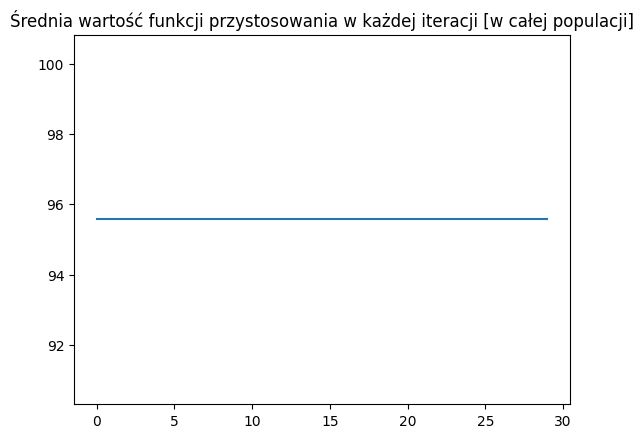

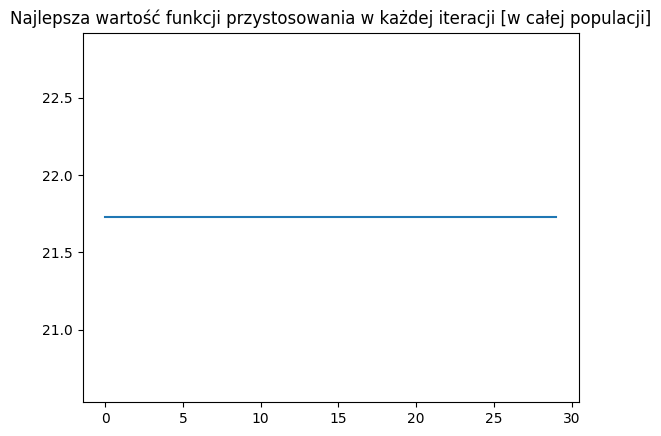

In [33]:
import matplotlib.pyplot as plt
# uruchomienie algorytmu PSO dla wybranej funkcji

avgs = []
bests_fitness = []

solution, fitness = pso(cost_func = adaptation_function, max_iter = 30, c1=2, c2=0)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

zwrócić uwagę na znaczenie parametru c2

Epoch: 0
Swarm best position: [-2.21725891  0.23390412]
Swarm best fitness: 14.612598814531326
Epoch: 1
Swarm best position: [-2.16510474  0.21568417]
Swarm best fitness: 11.783135288573249
Epoch: 2
Swarm best position: [-0.17188452 -1.90530894]
Swarm best fitness: 7.383922948692302
Epoch: 3
Swarm best position: [ 3.29512235 -6.36788335]
Swarm best fitness: 7.383922948692302
Epoch: 4
Swarm best position: [ 4.38913426 -6.50160433]
Swarm best fitness: 7.383922948692302
Epoch: 5
Swarm best position: [ 4.77000754 -5.18508121]
Swarm best fitness: 7.383922948692302
Epoch: 6
Swarm best position: [ 1.25977883 -4.3626769 ]
Swarm best fitness: 7.383922948692302
Epoch: 7
Swarm best position: [ 0.14732348 -0.15758245]
Swarm best fitness: 4.551883476312214
Epoch: 8
Swarm best position: [-1.11068233  1.85251058]
Swarm best fitness: 4.551883476312214
Epoch: 9
Swarm best position: [-1.40181775  2.3377892 ]
Swarm best fitness: 4.551883476312214
Epoch: 10
Swarm best position: [-1.39975212  1.26339049]
S

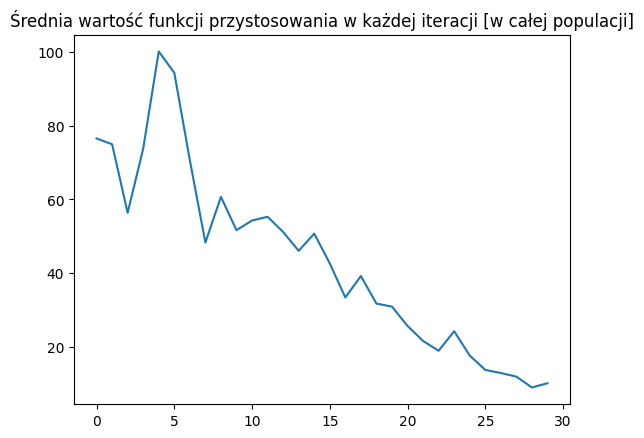

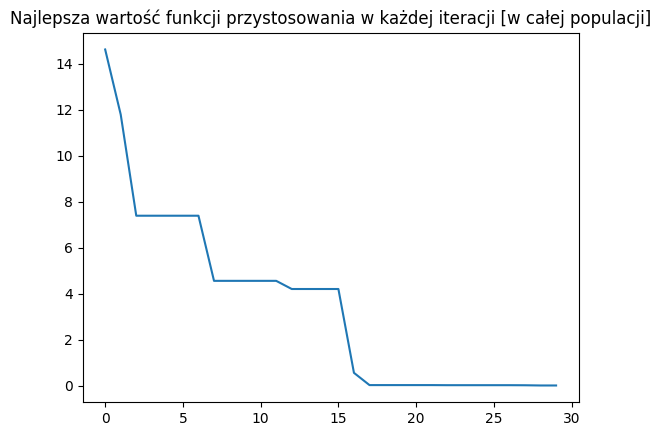

In [36]:
import matplotlib.pyplot as plt
# uruchomienie algorytmu PSO dla wybranej funkcji

avgs = []
bests_fitness = []

solution, fitness = pso(cost_func = adaptation_function, max_iter = 30, c1=1, c2=2)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

Epoch: 0
Swarm best position: [-2.08028147 -3.88274717]
Swarm best fitness: 21.377660704198433
Epoch: 1
Swarm best position: [-2.08028147 -3.88274717]
Swarm best fitness: 21.377660704198433
Epoch: 2
Swarm best position: [ 2.19839805 -0.02995088]
Swarm best fitness: 8.683024142076711
Epoch: 3
Swarm best position: [3.84012064 1.29562126]
Swarm best fitness: 8.683024142076711
Epoch: 4
Swarm best position: [ 1.42849513 -0.51434984]
Swarm best fitness: 8.683024142076711
Epoch: 5
Swarm best position: [ 0.69976148 -0.73226944]
Swarm best fitness: 8.683024142076711
Epoch: 6
Swarm best position: [ 1.11390061 -0.39811147]
Swarm best fitness: 8.683024142076711
Epoch: 7
Swarm best position: [3.38092002 0.01653031]
Swarm best fitness: 8.683024142076711
Epoch: 8
Swarm best position: [2.59454169 0.19191667]
Swarm best fitness: 8.683024142076711
Epoch: 9
Swarm best position: [ 1.75067399 -0.01547197]
Swarm best fitness: 8.683024142076711
Epoch: 10
Swarm best position: [-2.03387492 -0.05404432]
Swarm b

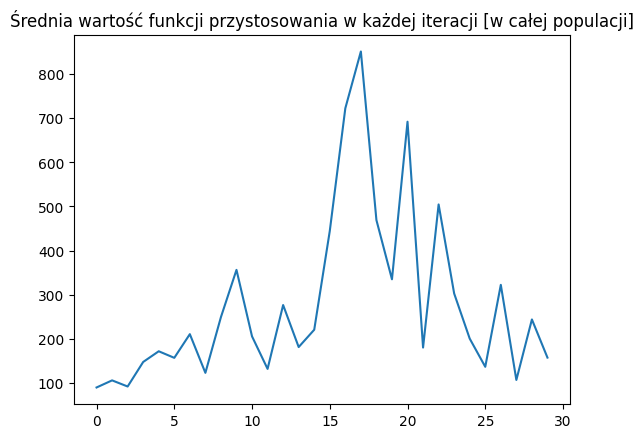

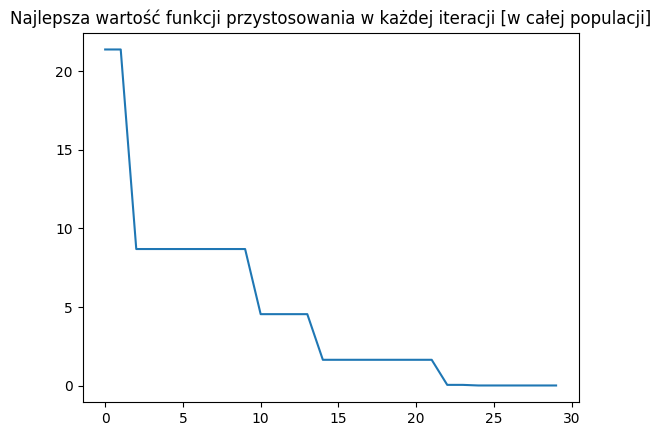

In [41]:
import matplotlib.pyplot as plt
# uruchomienie algorytmu PSO dla wybranej funkcji

avgs = []
bests_fitness = []

solution, fitness = pso(cost_func = adaptation_function, max_iter = 30, c1=2.2, c2=2.2)
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()

In [42]:
import random

def gray_to_int(gray):
  binary = '0' + gray
  n = int(binary, 2)
  original = n ^ (n >> 1)
  return original

def int_to_gray(n):
  gray = n ^ (n >> 1)
  binary = format(gray, '08b')
  return binary

class Individual:
  def __init__(self, chromosome):
    self.chromosome = chromosome
  
  def crossover(self, other):
    if len(self.chromosome) != len(other.chromosome):
      raise ValueError("Chromosomes must have the same length.")
    
    child_chromosome = []
    for i in range(len(self.chromosome)):
      # bin_first = f'0b{self.chromosome[i]:08b}'[2:]
      # bin_other = f'0b{other.chromosome[i]:08b}'[2:]

      gray_first = int_to_gray(self.chromosome[i])
      gray_other = int_to_gray(other.chromosome[i])

      cut_position = random.randint(0, 7)

      # bin_child = bin_first[:cut_position] + bin_other[cut_position:]

      gray_child = gray_first[:cut_position] + gray_other[cut_position:]
      int_child = gray_to_int(gray_child)
      
      # int_child = int(bin_child, 2)

      # avg = (self.chromosome[i] + other.chromosome[i]) // 2

      child_chromosome.append(int_child)
    
    return Individual(child_chromosome)
  
  def mutation(self):
    mutated = self.chromosome.copy()
    for i in range(len(self.chromosome)):
      # bin_number = f'0b{self.chromosome[i]:08b}'[2:]
      gray_number = int_to_gray(self.chromosome[i])

      mut_position = random.randint(0, 7)

      # muntated_num = '1' if bin_number[mut_position] == '0' else '1'
      # b = list(bin_number)[mut_position] = muntated_num
      # bin_number = ''.join(b)

      muntated_num = '1' if gray_number[mut_position] == '0' else '1'
      g = list(gray_number)[mut_position] = muntated_num
      gray_number = ''.join(g)

      # int_number = int(bin_number, 2)

      int_number = gray_to_int(gray_number)
      self.chromosome[i] = int_number

    self.chromosome = mutated


Solution
Best solution:  x:  0  y:  0
Best value:  0.0


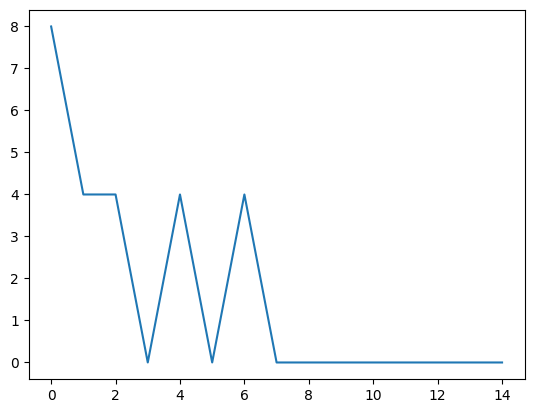

czas wykonania: 0.06270623207092285


In [48]:
import random
import time

def generate_population(pop_size):
  population = []
  for i in range(pop_size):
    chromosome = [random.randint(0, 20) for _ in range(2)]
    population.append(Individual(chromosome))
  return population


def adap_function(arg):
    x, y = arg
    x -= 10
    y -= 10
    return x**2 + y**2 - 20 * ( np.cos(np.pi * x) + np.cos(np.pi * y) -2  )

pop_size = 100
iterations = 15

st = time.time()
population = generate_population(pop_size)
best_solutions = []
best_adaptations = []

for iter in range(iterations):
  # wyliczenie wartości funkcji adaptacji
  adaptations = [adap_function(item.chromosome) for item in population]

  best_adaptation = min(adaptations)
  best_solution = population[adaptations.index(best_adaptation)]
  best_solutions.append(best_solution)
  best_adaptations.append(best_adaptation)

  # podział populacji kołem ruletki

  roulette_wheel = adaptations

  for i in range(len(roulette_wheel)):
    adaptation_range = max(adaptations) - min(adaptations)
    if adaptation_range == 0:
        roulette_wheel[i] = 1.0
    else:
        roulette_wheel[i] -= min(adaptations)
        roulette_wheel[i] /= adaptation_range
        roulette_wheel[i] = 1 - roulette_wheel[i]

  # tworzymy z populacji dwie listę, ważoną kołem ruletki

  parents = [random.choices(population, weights=roulette_wheel, k = 2) for i in range(pop_size)]

  children = [p[0].crossover(p[1]) for p in parents]

  mutation_prob = 0.3

  for child in children:
    if random.random() < mutation_prob:
      child.mutation()

  population = children

end_t = time.time()

very_best_solution = best_solutions[best_adaptations.index(min(best_adaptations))]

print('Solution')

print('Best solution: ', 'x: ', very_best_solution.chromosome[0] - 10, ' y: ', very_best_solution.chromosome[1] - 10 )
print('Best value: ', adap_function(very_best_solution.chromosome))

plt.plot(best_adaptations)
plt.show()


print(f'czas wykonania: {end_t - st}' )



---
Rozwiązanie: [0.03859201 0.02315182]
Wartość funkcji przystosowania: 0.2017160586766963


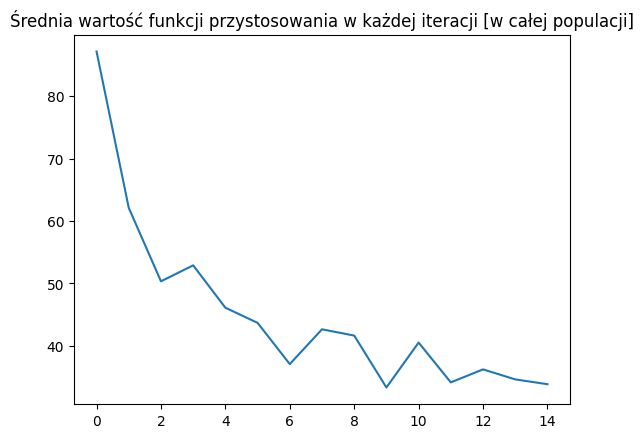

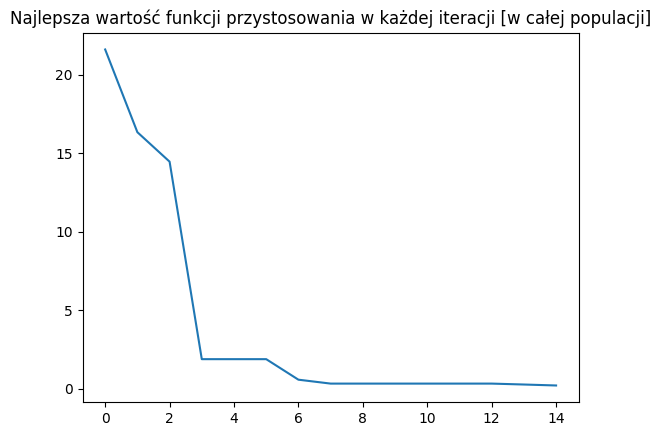

czas wykonania: 0.009238481521606445


In [49]:
import matplotlib.pyplot as plt
import time
# uruchomienie algorytmu PSO dla wybranej funkcji

avgs = []
bests_fitness = []
start = time.time()
solution, fitness = pso(cost_func = adaptation_function, max_iter = 15, c1=1.25, c2=0.75, w = 0.4)
end_time = time.time()
print('---')
# wydrukowanie wyników
print('Rozwiązanie:', solution)
print('Wartość funkcji przystosowania:', fitness)

plt.plot(avgs)
plt.title("Średnia wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print('    ')
plt.plot(bests_fitness)
plt.title("Najlepsza wartość funkcji przystosowania w każdej iteracji [w całej populacji]")
plt.show()
print(f'czas wykonania: {end_time - start}' )